In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,precision_recall_fscore_support,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

import warnings

warnings.filterwarnings("ignore")

In [ ]:
wine_df=pd.read_csv("C:/Users/user/Downloads/datasets_4458_8204_winequality-red.csv")

In [ ]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine_df.dtypes ##String-Object data type


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

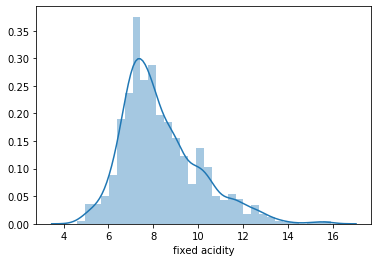

In [ ]:
sns.distplot(wine_df['fixed acidity']) ## Continous variables

In [ ]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


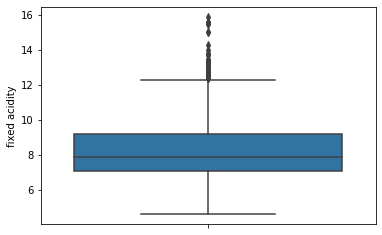

In [ ]:
sns.boxplot('fixed acidity',data=wine_df,orient='v')

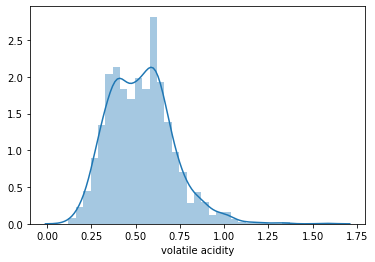

In [ ]:
sns.distplot(wine_df['volatile acidity'])

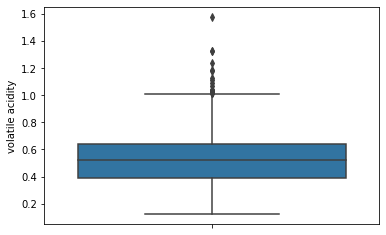

In [ ]:
sns.boxplot('volatile acidity',data=wine_df,orient='v')

In [ ]:
def outliers(data,features):
    for c in features:
        Q1=np.percentile(data[c],25)
        Q3=np.percentile(data[c],75)
        IQR=Q3-Q1
        lower_end=Q1-(1.5*IQR)
        upper_end=Q3+(1.5*IQR)
        df_final=data[~(((data[c])<(Q1-(1.5*IQR)))|((data[c])>(Q3+(1.5*IQR))))]
        return df_final

In [ ]:
wine_df=outliers(wine_df,wine_df.columns)

In [ ]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine_df['quality'].value_counts() ## data balance

5    666
6    616
7    189
4     52
8     17
3     10
Name: quality, dtype: int64

In [ ]:
(wine_df['quality'].value_counts()/len(wine_df['quality']))*100

5    42.967742
6    39.741935
7    12.193548
4     3.354839
8     1.096774
3     0.645161
Name: quality, dtype: float64

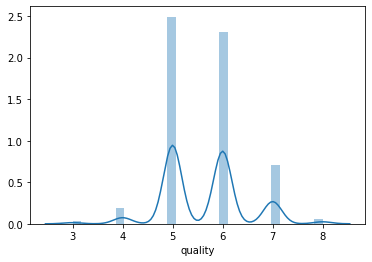

In [ ]:
sns.distplot(wine_df['quality'])

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
X=wine_df.iloc[:,:11]
Y=wine_df['quality']
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1550, dtype: int64

In [ ]:

lr=LogisticRegression()

##KNN
knn=KNeighborsClassifier()

## Decision Tree
    
dt=tree.DecisionTreeClassifier()
        
 ## Randon Forest
    
forest_model=RandomForestClassifier()        

In [ ]:
def Model_cv(X1,Y1,model):
    
    np.random.seed(0)
    X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.3,random_state=100)
    sc=StandardScaler()
    
    X_train=sc.fit_transform(X_train)
    X_test=sc.fit_transform(X_test)
     
    model.fit(X_train,Y_train)
    #Test data prediction
    y_pred=model.predict(X_test)
    
    # Train data Predcition
    y_train_pred=model.predict(X_train)
    
    
    print(cross_val_score(model,X_train,Y_train,cv=7,scoring='accuracy').mean())
    
    training_Score = accuracy_score(Y_train,y_train_pred.round())
    testing_score = accuracy_score(Y_test,y_pred.round())
    
    print('Metrics for the model',model)
    
    print("Trainig Score_",  training_Score)
    print("Testing Score_",testing_score)

    print(confusion_matrix(Y_train,y_train_pred))
    
    print(confusion_matrix(Y_test,y_pred))
    
    print('Classification report on training',classification_report(Y_train,y_train_pred))
    
    print('Classification report on testing',classification_report(Y_test,y_pred))
    
    print('Precison Score on Training',precision_score(Y_train,y_train_pred.round(),average=None))
 
    print('Precison Score on Testing',precision_score(Y_test,y_pred.round(),average=None))
    

    

In [ ]:
Model_cv(X,Y,lr)

0.5981566820276497
Metrics for the model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Trainig Score_ 0.6110599078341014
Testing Score_ 0.6021505376344086
[[  0   0   6   1   0   0]
 [  0   1  20  12   2   0]
 [  0   2 352 103   1   0]
 [  0   0 136 268  28   0]
 [  0   0   9  88  42   0]
 [  0   0   0   8   6   0]]
[[  0   2   1   0   0   0]
 [  0   0  11   6   0   0]
 [  0   0 146  60   2   0]
 [  0   0  59 114  11   0]
 [  0   0   0  30  20   0]
 [  0   0   0   1   2   0]]
Classification report on training               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.33      0.03      0.05        35
           5       0.67      0.77      0.7

In [ ]:
Model_cv(X,Y,knn)

0.5612903225806452
Metrics for the model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Trainig Score_ 0.695852534562212
Testing Score_ 0.5956989247311828
[[  0   0   4   3   0   0]
 [  0   3  18  12   2   0]
 [  1   4 373  77   3   0]
 [  1   2  88 314  26   1]
 [  0   0  17  57  65   0]
 [  0   0   1   6   7   0]]
[[  0   1   2   0   0   0]
 [  0   2  10   5   0   0]
 [  1   1 139  59   7   1]
 [  0   1  60 113  10   0]
 [  0   0   3  24  23   0]
 [  0   0   0   2   1   0]]
Classification report on training               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.33      0.09      0.14        35
           5       0.74      0.81      0.78       458
           6       0.67      0.73      0.70       432
           7       0.63      0.47      0.54       139
           8       0

In [ ]:
Model_cv(X,Y,dt)

0.5640552995391704
Metrics for the model DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Trainig Score_ 1.0
Testing Score_ 0.5376344086021505
[[  7   0   0   0   0   0]
 [  0  35   0   0   0   0]
 [  0   0 458   0   0   0]
 [  0   0   0 432   0   0]
 [  0   0   0   0 139   0]
 [  0   0   0   0   0  14]]
[[  0   2   0   1   0   0]
 [  0   1   8   6   2   0]
 [  0   7 125  62  13   1]
 [  1   8  54  95  26   0]
 [  0   0   3  12  29   6]
 [  0   0   0   1   2   0]]
Classification report on training               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
          

In [ ]:
Model_cv(X,Y,forest_model)

0.6718894009216589
Metrics for the model RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Trainig Score_ 1.0
Testing Score_ 0.6881720430107527
[[  7   0   0   0   0   0]
 [  0  35   0   0   0   0]
 [  0   0 458   0   0   0]
 [  0   0   0 432   0   0]
 [  0   0   0   0 139   0]
 [  0   0   0   0   0  14]]
[[  0   0   3   0   0   0]
 [  1   0  12   4   0   0]
 [  0   0 155  52   1   0]
 [  0   0  41 136   7   0]
 [  0   0   0  18  29   3]
 [  0   0   0   2   1   0]]
Classification report on training

In [ ]:
Y=wine_df['quality']
Y1=label_binarize(Y,classes=[5, 6, 7, 4, 8, 3])  
n_classes=Y1.shape[1]

In [ ]:
def roc_curves(x,y):
    Y1=label_binarize(Y,classes=[5,6,7,4,8,3])
    n_classes = Y1.shape[1]
    np.random.seed(0)
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.3,random_state=100)
    clf = OneVsRestClassifier(x)
    
    clf.fit(X_train,Y_train)
    
    y_score = clf.predict_proba(X_test)
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_auc)
    for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

## Resampling the data to handle the imbalancing issue

In [ ]:
sm=SMOTE(random_state=100,k_neighbors=6)

In [ ]:
X_res,Y_res=sm.fit_sample(X,Y)

In [ ]:
X_res.shape,Y_res.shape

((3996, 11), (3996,))

In [ ]:
np.random.seed(0)
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X_res,Y_res,test_size=0.3,random_state=100)
sc=StandardScaler()
X1_train=sc.fit_transform(X1_train)
X1_test=sc.fit_transform(X1_test)

In [ ]:
def Model(z,a,b,c,d):
    
    #Fitting the Classification Models
    z.fit(a,c)
    y_train_pred=z.predict(a)
    y_test_pred=z.predict(b)
    
    #cross Validation Score
    cv_z_score=(cross_val_score(z,a,c,scoring='accuracy',cv=7)).mean()
    
    #Accuracy of the training and testing
    training_Score = accuracy_score(c,y_train_pred)
    testing_score = accuracy_score(d,y_test_pred)
    print("cv_score", cv_z_score) 
    print("TRAINING SCORE",  training_Score)
    print("TESTING SCORE",testing_score)
    print("\n")
    print('--'*30)
    print('\n')
    print("TRAINING CONFUSION MATRIX")
    print(confusion_matrix(c,y_train_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print("TESTING  CONFUSION MATRIX")
    print(confusion_matrix(d,y_test_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TRAINING')
    print(classification_report(c,y_train_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TESTING')
    print(classification_report(d,y_test_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print('Precison Score on Training')
    print(precision_score(c,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('Precison Score on Testing')
    print(precision_score(d,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Training')
    print(recall_score(c,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Testing')
    print(recall_score(d,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Training')
    print(f1_score(c,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Testing')
    print(f1_score(d,y_test_pred,average=None))

In [ ]:
Model(lr,X1_train,X1_test,Y1_train,Y1_test)

cv_score 0.5745417114214106
TRAINING SCORE 0.5874150875938505
TESTING SCORE 0.5963302752293578


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[413  64   0   0   0   0]
 [ 69 240 101  57   4   1]
 [ 36  90 234  70  16   7]
 [ 10  50  95 163 101  33]
 [  0  14   9  90 222 141]
 [  0   0   0   0  96 371]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[171  18   0   0   0   0]
 [ 30 102  37  21   3   1]
 [ 14  44 112  32   9   2]
 [  9  31  41  76  30  27]
 [  0   6   1  36  94  53]
 [  0   0   0   0  39 160]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           3       0.78      0.87      0.82       477
           4       0.52      0.51      0.52       472
           5       0.53      0.52      0.52       453
           6       0.43      0.36      0.39       452
           7       0.51    

In [ ]:
Model(knn,X1_train,X1_test,Y1_train,Y1_test)

cv_score 0.7615243465807376
TRAINING SCORE 0.8484090096531999
TESTING SCORE 0.7472894078398665


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[477   0   0   0   0   0]
 [  3 466   1   1   1   0]
 [ 11  66 286  63  22   5]
 [  8  53  63 245  64  19]
 [  3   1   3  15 432  22]
 [  0   0   0   0   0 467]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[188   1   0   0   0   0]
 [  2 186   1   2   3   0]
 [ 11  42 106  37  14   3]
 [  8  35  47  64  45  15]
 [  3   1   3  12 153  18]
 [  0   0   0   0   0 199]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           3       0.95      1.00      0.97       477
           4       0.80      0.99      0.88       472
           5       0.81      0.63      0.71       453
           6       0.76      0.54      0.63       452
           7       0.83    

In [ ]:
Model(dt,X1_train,X1_test,Y1_train,Y1_test)

cv_score 0.7593779090583601
TRAINING SCORE 1.0
TESTING SCORE 0.7264386989157632


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[477   0   0   0   0   0]
 [  0 472   0   0   0   0]
 [  0   0 453   0   0   0]
 [  0   0   0 452   0   0]
 [  0   0   0   0 476   0]
 [  0   0   0   0   0 467]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[180   3   6   0   0   0]
 [  9 148  26   9   2   0]
 [ 12  21 134  41   5   0]
 [  8  25  42  96  35   8]
 [  0   1   4  20 152  13]
 [  0   0   0   6  32 161]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       477
           4       1.00      1.00      1.00       472
           5       1.00      1.00      1.00       453
           6       1.00      1.00      1.00       452
           7       1.00      1.00      1.0

In [ ]:
Model(forest_model,X1_train,X1_test,Y1_train,Y1_test)

cv_score 0.848421947726459
TRAINING SCORE 1.0
TESTING SCORE 0.8523769808173478


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[477   0   0   0   0   0]
 [  0 472   0   0   0   0]
 [  0   0 453   0   0   0]
 [  0   0   0 452   0   0]
 [  0   0   0   0 476   0]
 [  0   0   0   0   0 467]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[189   0   0   0   0   0]
 [  1 186   6   0   1   0]
 [  2  15 161  29   6   0]
 [  7  14  37 119  30   7]
 [  0   0   0  10 174   6]
 [  0   0   0   0   6 193]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       477
           4       1.00      1.00      1.00       472
           5       1.00      1.00      1.00       453
           6       1.00      1.00      1.00       452
           7       1.00      1.00      1.00

In [ ]:
Y=wine_df['quality']
Y1=label_binarize(Y_res,classes=[5,6,7,4,8,3])
n_classes=Y1.shape[1]

In [ ]:
def roc_curves(x,Y):
    Y1=label_binarize(Y,classes=[5,6,7,4,8,3])
    n_classes = Y1.shape[1]
    np.random.seed(0)
    X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y1, test_size=.3,random_state=100)
    clf = OneVsRestClassifier(x)
    
    clf.fit(X_train,Y_train)
    
    y_score = clf.predict_proba(X_test)
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_auc)
    for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
        

{0: 0.820958739763184, 1: 0.7152331127865825, 2: 0.9368090452261305, 3: 0.6484558090991034, 4: 0.9784902299753785, 5: 0.8167918940281311}


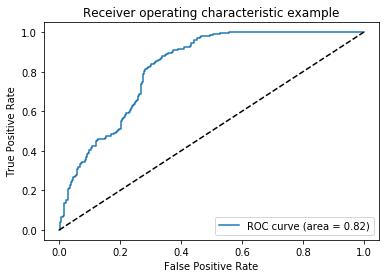

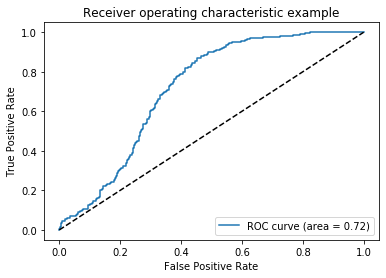

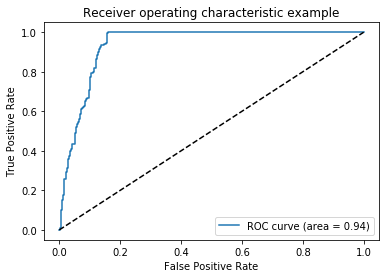

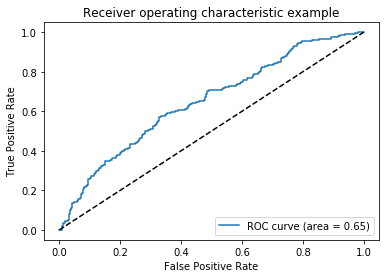

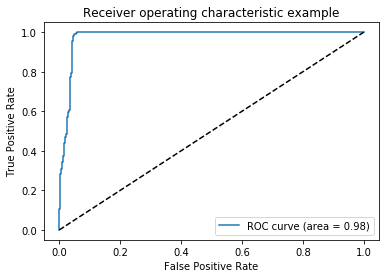

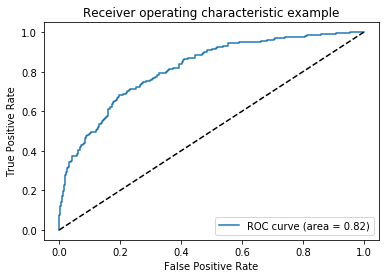

In [ ]:
roc_curves(lr,Y1) 

{0: 0.9409185749308853, 1: 0.9299353746730267, 2: 0.974997487437186, 3: 0.7489990037478059, 4: 0.9863376813871864, 5: 0.8084568941709758}


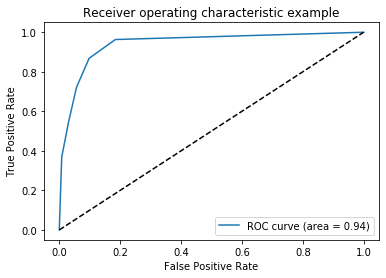

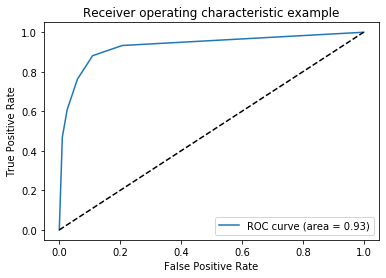

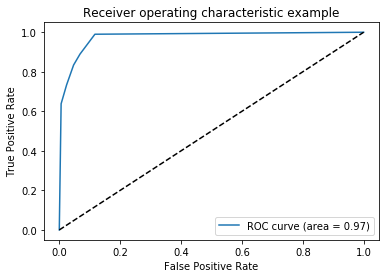

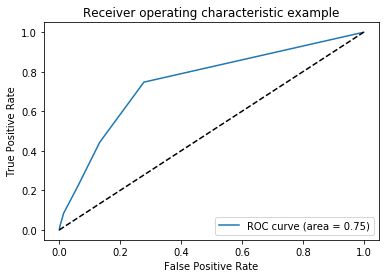

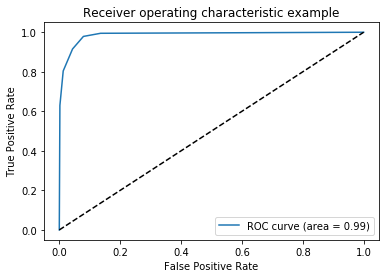

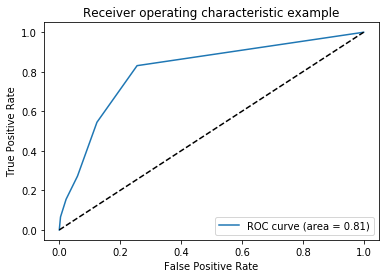

In [ ]:
roc_curves(knn,Y1)

{0: 0.8651922174117156, 1: 0.8534030876545109, 2: 0.9663743718592964, 3: 0.7089876180084445, 4: 0.9758813976635758, 5: 0.7760715748173965}


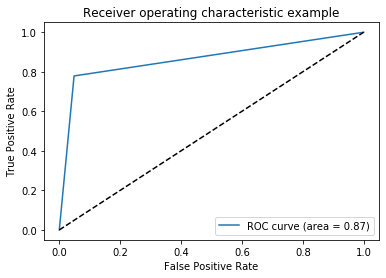

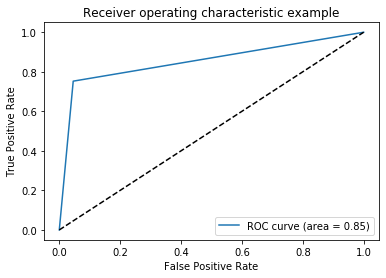

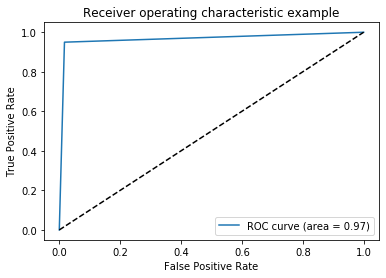

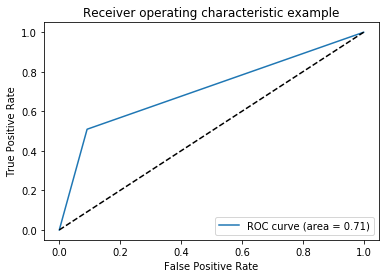

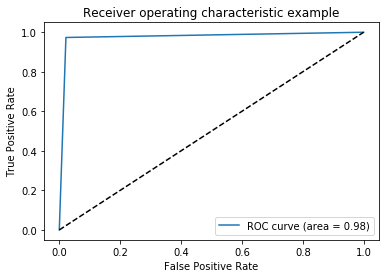

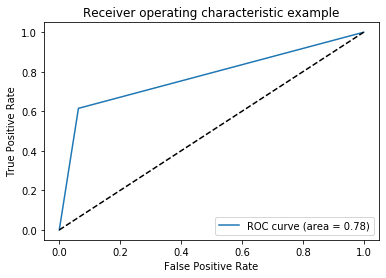

In [ ]:
roc_curves(dt,Y1)

{0: 0.987525429033436, 1: 0.9880956044519669, 2: 0.9997914572864323, 3: 0.9262441292281418, 4: 0.9999214207134999, 5: 0.9529873629879344}


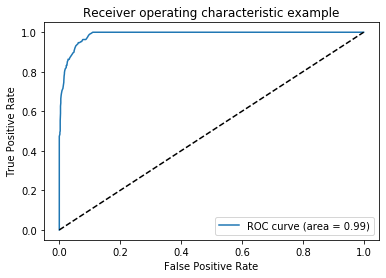

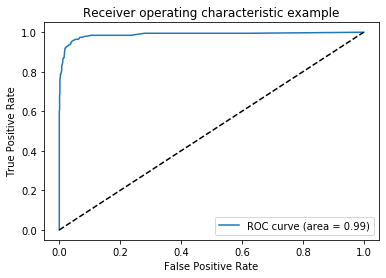

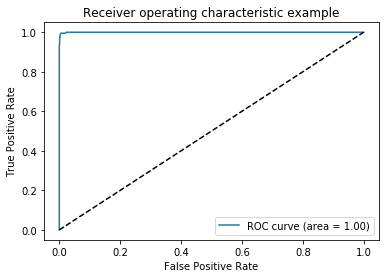

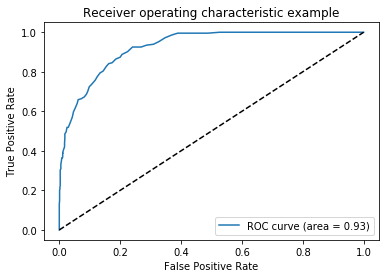

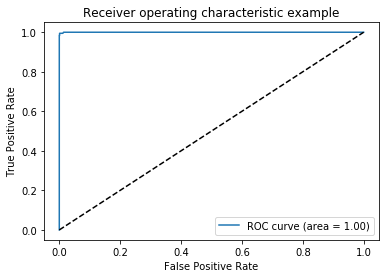

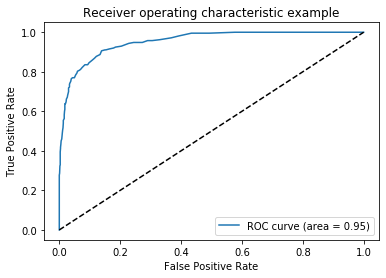

In [ ]:
roc_curves(forest_model,Y1)

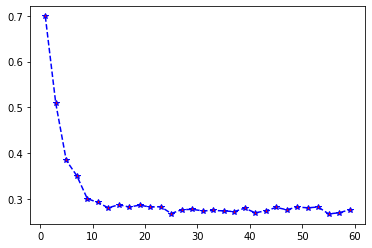

In [ ]:
error_rate=[]
for i in range(1,60,2):
    dt=tree.DecisionTreeClassifier(max_depth=i)
    dt.fit(X1_train,Y1_train)
    y_test_pred=dt.predict(X1_test)
    error_rate.append(np.mean(y_test_pred!=Y1_test))
plt.figure()
plt.plot(range(1,60,2),error_rate,'b--',marker='*',markerfacecolor='red')
plt.show()

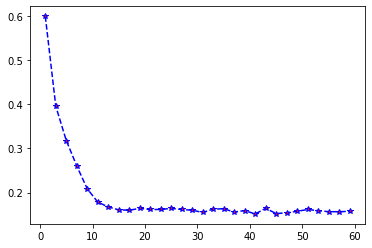

In [ ]:
error_rate=[]
for i in range(1,60,2):
    rf=RandomForestClassifier(max_depth=i)
    rf.fit(X1_train,Y1_train)
    y_test_pred=rf.predict(X1_test)
    error_rate.append(np.mean(y_test_pred!=Y1_test))
plt.figure()
plt.plot(range(1,60,2),error_rate,'b--',marker='*',markerfacecolor='red')
plt.show()

## Feature Importance

In [ ]:
from sklearn.model_selection import GridSearchCV      

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
def Model(z,a,b,c,d):
    
    
    
    #fitting the data into X_train and Y_tra
    z.fit(X1_train,y1_train)
    y_train_pred=z.predict(X1_train)
    y_test_pred=z.predict(X1_test)
    print(X1_train.shape)
    
    
    #cross Validation Score
    cv_z_score=(cross_val_score(z,X1_train,y1_train,scoring='accuracy',cv=5)).mean()
    
    #Accuracy of the training and testing
    training_Score = accuracy_score(y1_train,y_train_pred)
    testing_score = accuracy_score(y1_test,y_test_pred)
    print("cv_score", cv_z_score) 
    print("TRAINING SCORE",  training_Score)
    print("TESTING SCORE",testing_score)
    print("\n")
    print('--'*30)
    print('\n')
    print("TRAINING CONFUSION MATRIX")
    print(confusion_matrix(y1_train,y_train_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print("TESTING  CONFUSION MATRIX")
    print(confusion_matrix(y1_test,y_test_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TRAINING')
    print(classification_report(y1_train,y_train_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TESTING')
    print(classification_report(y1_test,y_test_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print('Precison Score on Training')
    print(precision_score(y1_train,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('Precison Score on Testing')
    print(precision_score(y1_test,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Training')
    print(recall_score(y1_train,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Testing')
    print(recall_score(y1_test,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Training')
    print(f1_score(y1_train,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Testing')
    print(f1_score(y1_test,y_test_pred,average=None))
    

## Random Forest

In [ ]:
np.random.seed(0)
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X_res,Y_res,test_size=0.3,random_state=100)
print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)

(2797, 11)
(1199, 11)
(2797,)
(1199,)


In [ ]:
rf1=RandomForestClassifier()
rf1.fit(X1_train,Y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
f_imp=rf1.feature_importances_

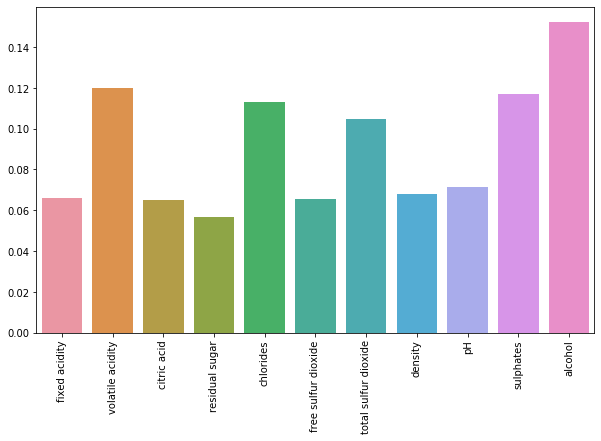

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(X1_train.columns,f_imp)
plt.xticks(rotation=90)
plt.show()

In [ ]:
sorted_idx=np.argsort(f_imp)
sorted_idx

array([ 3,  2,  5,  0,  7,  8,  6,  4,  9,  1, 10], dtype=int64)

In [ ]:
X1_train.columns[sorted_idx]

Index(['residual sugar', 'citric acid', 'free sulfur dioxide', 'fixed acidity',
       'density', 'pH', 'total sulfur dioxide', 'chlorides', 'sulphates',
       'volatile acidity', 'alcohol'],
      dtype='object')

In [ ]:
f_imp[sorted_idx]

array([0.05662324, 0.06526293, 0.06561808, 0.06596347, 0.06775292,
       0.07133819, 0.10490833, 0.11307286, 0.11715221, 0.12002316,
       0.15228461])

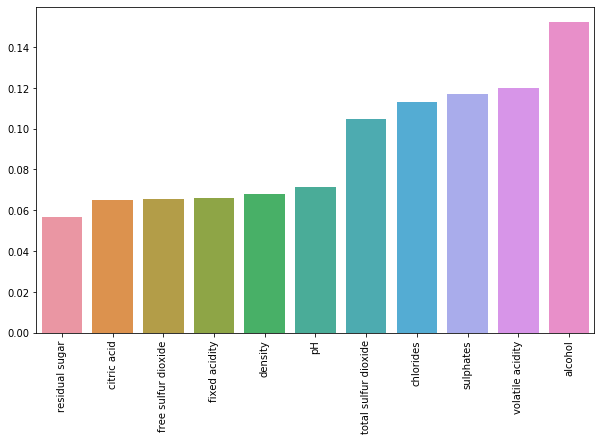

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(X1_train.columns[sorted_idx],f_imp[sorted_idx])
plt.xticks(rotation= 90)
plt.show()

## RFE

In [ ]:
rfe1=RFE(estimator=rf1)
rfe1=rfe.fit(X1_train,Y1_train)

In [ ]:
rfe1.support_

array([False,  True, False, False,  True, False,  True, False, False,
        True,  True])

In [ ]:
list(zip(X1_train.columns,rfe1.support_,rfe1.ranking_))

[('fixed acidity', False, 6),
 ('volatile acidity', True, 1),
 ('citric acid', False, 5),
 ('residual sugar', False, 7),
 ('chlorides', True, 1),
 ('free sulfur dioxide', False, 4),
 ('total sulfur dioxide', True, 1),
 ('density', False, 2),
 ('pH', False, 3),
 ('sulphates', True, 1),
 ('alcohol', True, 1)]

In [ ]:
rfe1.ranking_

array([6, 1, 5, 7, 1, 4, 1, 2, 3, 1, 1])

In [ ]:
features=[]
for i,j in enumerate(rfe1.ranking_):
    if j==1:
        features.append(X1_train.columns[i])

In [ ]:
print(features)

['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']


In [ ]:
print(X_res.shape)

(3996, 11)


In [ ]:
X_res=X_res[features]
print(X_res.shape)

(3996, 5)


In [ ]:
Y_res

0       5
1       5
2       5
3       6
4       5
       ..
3991    8
3992    8
3993    8
3994    8
3995    8
Name: quality, Length: 3996, dtype: int64

In [ ]:
np.random.seed(0)
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X_res,Y_res,test_size=0.3,random_state=100)
print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)

(2797, 5)
(1199, 5)
(2797,)
(1199,)


In [ ]:
Model(rf1,X1_train,X1_test,Y1_train,Y1_test)

(2797, 5)
cv_score 0.741149373881932
TRAINING SCORE 1.0
TESTING SCORE 0.755629691409508


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[477   0   0   0   0   0]
 [  0 472   0   0   0   0]
 [  0   0 453   0   0   0]
 [  0   0   0 452   0   0]
 [  0   0   0   0 476   0]
 [  0   0   0   0   0 467]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[179   6   0   2   2   0]
 [  4 154  20  14   2   0]
 [ 12  20 137  37   4   3]
 [  8  21  44 100  34   7]
 [  0   0   3  26 146  15]
 [  0   0   0   4   5 190]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       477
           4       1.00      1.00      1.00       472
           5       1.00      1.00      1.00       453
           6       1.00      1.00      1.00       452
           7       1.00      1.00 

## GridSearch CV

In [ ]:
parameterts={'n_estimators':[10,30,50,100],
    'criterion':['gini','entropy'],
             'max_depth':np.arange(2,50,2),
    'max_features':[2,3]}

In [ ]:
gridsearch=GridSearchCV(estimator=rf1,param_grid=parameters)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import time
start=time.time()
gridsearch.fit(X1_train,Y1_train)
print(X1_train.shape)
end=time.time()
print('Total time taken is',end-start)

(2797, 5)
Total time taken is 4.427148342132568


In [ ]:
gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 36, 'max_features': 3}

In [ ]:
rf2=RandomForestClassifier(criterion='entropy',max_depth=36,max_features=3)

In [ ]:
np.random.seed(0)
rf2.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=36, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_test_pred=rf2.predict(X1_test)
accuracy_score(y1_test,y_test_pred)

0.8340283569641368

In [ ]:
Model(rf2,X1_train,X1_test,y1_train,y1_test)

(2797, 5)
cv_score 0.8083682596473295
TRAINING SCORE 1.0
TESTING SCORE 0.8348623853211009


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[477   0   0   0   0   0]
 [  0 472   0   0   0   0]
 [  0   0 453   0   0   0]
 [  0   0   0 452   0   0]
 [  0   0   0   0 476   0]
 [  0   0   0   0   0 467]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[188   1   0   0   0   0]
 [  3 182   9   0   0   0]
 [  9  17 155  27   5   0]
 [  7  16  37 122  27   5]
 [  0   0   3  19 157  11]
 [  0   0   0   0   2 197]]


------------------------------------------------------------


CLASSIFICATION REPORT ON TRAINING
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       477
           4       1.00      1.00      1.00       472
           5       1.00      1.00      1.00       453
           6       1.00      1.00      1.00       452
           7       1.00      1.0